# Fingerprints

In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [3]:
# load dataset 

with open("../data/drd3_chembl_cmpds.csv", 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    drd3_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drugs = [m for m in suppl if m]

[13:18:58] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:18:58] ERROR: Could not sanitize molecule ending on line 20009
[13:18:58] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[13:18:58] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:18:58] ERROR: Could not sanitize molecule ending on line 250947
[13:18:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:18:58] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:18:58] ERROR: Could not sanitize molecule ending on line 258130
[13:18:58] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[13:18:58] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:18:58] ERROR: Could not sanitize molecule ending on line 261581
[13:18:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:18:59] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[13:18:59] ERROR: Coul

In [4]:
# ECFP are done using the RDKit pretty much the same way as MACCS keys
molecule = Chem.MolFromSmiles("COO")
fp = Chem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=1024)
# 3 for the radius, 1024 for the number of bits
fp

In [5]:
fp.ToBitString() # write the fingerprint as a string of 0s and 1s
# it is only ethanol, so only several bits are set

'000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [6]:
# let's do it for all the molecules in the datasets

drd3_ligands_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
                    for m in drd3_ligands]

drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
                for m in drugs]

In [8]:
# now we look at the bit occurence differences between the two datasets

drd3_ligands_ecfp_sums = [0]*drd3_ligands_ecfp[0].GetNumBits() # a list of 1024 zeros
for fp in drd3_ligands_ecfp:
    for i in fp.GetOnBits():
        drd3_ligands_ecfp_sums[i] += 1

drd3_ligands_ecfp_sums

[48,
 644,
 337,
 854,
 633,
 60,
 133,
 45,
 1345,
 795,
 403,
 325,
 247,
 617,
 310,
 1792,
 20,
 38,
 79,
 173,
 829,
 194,
 37,
 167,
 109,
 536,
 213,
 90,
 11,
 916,
 131,
 175,
 52,
 3853,
 196,
 36,
 807,
 34,
 31,
 301,
 179,
 494,
 603,
 182,
 187,
 275,
 424,
 63,
 15,
 28,
 67,
 26,
 203,
 218,
 22,
 46,
 17,
 84,
 35,
 164,
 156,
 91,
 94,
 588,
 4404,
 260,
 97,
 37,
 183,
 52,
 90,
 66,
 264,
 497,
 2644,
 103,
 48,
 324,
 81,
 94,
 5503,
 73,
 108,
 107,
 117,
 67,
 314,
 92,
 122,
 41,
 1332,
 206,
 407,
 75,
 295,
 64,
 60,
 71,
 38,
 85,
 60,
 97,
 444,
 44,
 319,
 154,
 61,
 50,
 36,
 9,
 51,
 24,
 433,
 37,
 1449,
 65,
 624,
 173,
 233,
 682,
 28,
 3740,
 81,
 142,
 39,
 73,
 96,
 138,
 2861,
 49,
 455,
 312,
 152,
 199,
 83,
 31,
 824,
 17,
 474,
 248,
 789,
 242,
 119,
 262,
 106,
 185,
 108,
 409,
 152,
 51,
 72,
 259,
 19,
 45,
 33,
 78,
 29,
 191,
 777,
 30,
 173,
 47,
 289,
 49,
 38,
 328,
 65,
 86,
 147,
 34,
 55,
 100,
 12,
 56,
 16,
 3358,
 73,
 91,
 8,
 

In [9]:
drugs_ecfp_sums = [0]*drugs_ecfp[0].GetNumBits() # a list of 1024 zeros
for fp in drugs_ecfp:
    for i in fp.GetOnBits():
        drugs_ecfp_sums[i] += 1

drugs_ecfp_sums

[120,
 2363,
 285,
 317,
 939,
 231,
 29,
 138,
 213,
 303,
 260,
 258,
 68,
 667,
 228,
 828,
 103,
 104,
 94,
 187,
 118,
 203,
 63,
 237,
 153,
 162,
 127,
 111,
 62,
 211,
 69,
 172,
 158,
 4267,
 155,
 111,
 1076,
 72,
 87,
 207,
 79,
 440,
 651,
 112,
 78,
 261,
 319,
 77,
 52,
 97,
 89,
 123,
 246,
 271,
 100,
 63,
 105,
 85,
 158,
 178,
 73,
 179,
 204,
 219,
 2683,
 147,
 55,
 174,
 97,
 228,
 76,
 345,
 179,
 388,
 255,
 465,
 75,
 283,
 134,
 482,
 4943,
 169,
 152,
 122,
 316,
 88,
 270,
 124,
 107,
 105,
 1542,
 90,
 163,
 54,
 308,
 97,
 114,
 158,
 96,
 86,
 61,
 119,
 402,
 63,
 197,
 160,
 245,
 79,
 173,
 84,
 162,
 73,
 534,
 56,
 797,
 155,
 396,
 608,
 353,
 767,
 78,
 770,
 118,
 165,
 82,
 193,
 109,
 47,
 2506,
 90,
 337,
 122,
 98,
 162,
 127,
 52,
 628,
 56,
 516,
 399,
 668,
 59,
 128,
 150,
 289,
 201,
 102,
 2461,
 87,
 79,
 106,
 104,
 370,
 65,
 67,
 126,
 66,
 183,
 282,
 49,
 159,
 45,
 232,
 135,
 134,
 262,
 108,
 98,
 73,
 96,
 129,
 262,
 137,
 202,

In [10]:
# set sizes are different so we normalize the bit occurence

drd3_ligands_ecfp_scaled = [x/len(drd3_ligands_ecfp) for x in drd3_ligands_ecfp_sums]
drugs_ecfp_scaled = [x/len(drugs_ecfp) for x in drugs_ecfp_sums]
drugs_ecfp_scaled

[0.016861036953772657,
 0.33202191934803993,
 0.04004496276521006,
 0.0445412392862161,
 0.13193761416327104,
 0.03245749613601236,
 0.004074750597161726,
 0.019390192496838557,
 0.029928340592946467,
 0.04257411830827596,
 0.03653224673317409,
 0.03625122945061121,
 0.00955458760713784,
 0.09371926373471968,
 0.03203597021216805,
 0.11634115498103133,
 0.014472390051988197,
 0.014612898693269635,
 0.013207812280455249,
 0.02627511591962906,
 0.01658001967120978,
 0.028523254180132077,
 0.008852044400730645,
 0.033300547983700995,
 0.021497822116060137,
 0.02276239988759309,
 0.017844597442742728,
 0.015596459182239708,
 0.008711535759449206,
 0.02964732331038359,
 0.009695096248419278,
 0.024167486300407475,
 0.02220036532246733,
 0.5995503723478994,
 0.021778839398623014,
 0.015596459182239708,
 0.15118729801882816,
 0.010116622172263594,
 0.012224251791485176,
 0.029085288745257832,
 0.011100182661233665,
 0.061823802163833076,
 0.09147112547421667,
 0.015736967823521148,
 0.0109596

In [11]:
# substract the two lists
# compute the differences, store bit numbers prior to sorting
drd3_drugbank_differences = [(i, a_b[0] - a_b[1]) 
                            for i, a_b in enumerate(zip(drd3_ligands_ecfp_scaled, drugs_ecfp_scaled))]
# sort by the difference
drd3_drugbank_differences.sort(key=lambda x: x[1])
drd3_drugbank_differences[:3], drd3_drugbank_differences[-3:]

([(147, -0.27691335595448313),
  (1, -0.22356789442382302),
  (807, -0.16005777560102707)],
 [(935, 0.5546919829574234),
  (456, 0.6248796459958373),
  (767, 0.6544344484595704)])

So, there are some bits in the ECFP that are less common in the DRD3 ligand set than in known drugs in Drugbank (the negative difference), and some that are much more common in the DRD3 ligand set (the positive difference). For simplicity, we look just at the top 3 of each.

The most prevalent bit among DRD3 ligands compared to DrugBank molecules is bit number 767. What does that bit mean? Unlike structural keys, the interpretation is not that simple. Let's redo the fingerprinting of the DRD3 ligands, but this time, specifically look at bit 767 and see what substructures were mapped to it during ECFP generation. Again, luckily for us, RDKit already has that functionality :)

In [17]:
# for ethanol example
bitinfo = {} # a dictionary to store info about what bits were set by what atoms
ethanol = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(ethanol, 2, nBits=1024, bitInfo=bitinfo)
list(fp.GetOnBits()), bitinfo

([33, 80, 222, 294, 386, 807],
 {33: ((0, 0),),
  80: ((1, 0),),
  222: ((2, 1),),
  294: ((0, 1),),
  386: ((1, 1),),
  807: ((2, 0),)})

Here, we have the few bits set in the ECFP fingerprint of ethanol, and the explanation of the set bits as atom index and radius of the corresponding substructures. Now, we just need to generate the actual substructures from these atom indices:

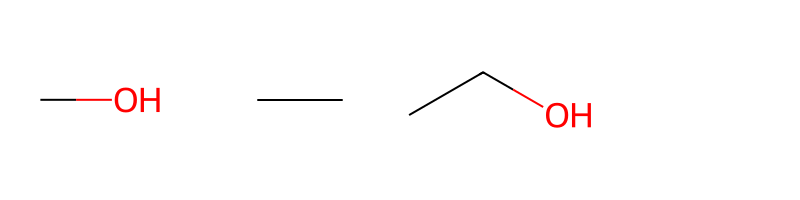

In [18]:
submols = []
for bit, atom_radius in bitinfo.items():
    atom, radius = atom_radius[0]
    if radius == 0: # radius 0 means just the atom, not useful as path
        continue
    hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(ethanol, radius, atom)
    submols.append(Chem.PathToSubmol(ethanol, hit_atoms))
Draw.MolsToGridImage(submols, molsPerRow=4, subImgSize=(200, 200))

Yeah, pretty much Ethanol :) Using this functionality, let's write a generic function that gets a Mol instance and a bit number, and spits out which fragments were responsible for that bit to be set in that particular molecule:

In [21]:
def substructures_of_bit_ecfp_1024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitinfo)
    hit_atoms = [Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom)
                 for atom, radius in bitinfo.get(bit, [])
                 if radius > 0]
    submols = [Chem.PathToSubmol(mol, atoms) for atoms in hit_atoms]
    return submols

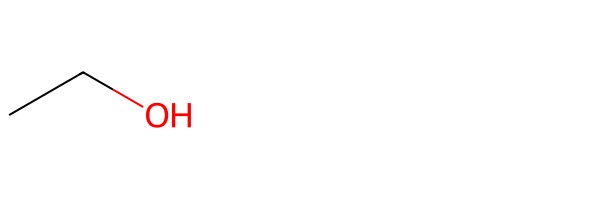

In [24]:
# test fnc
Draw.MolsToGridImage(substructures_of_bit_ecfp_1024(ethanol, 386))

Ok, seems to work... let's find out which substructures are responsible for the comparatively frequent bit 767 among MTOR ligands. You do the most comparatively frequent bit for your ligand set, on your ligand set :)

In [25]:
substructure_smiles = {}
for ligand in drd3_ligands:
    for submol in substructures_of_bit_ecfp_1024(ligand, 767):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'CN(C)C': 4317,
 'cc(c)c(c(C)[nH])C(C)N': 2,
 'ccc(F)cc': 17,
 'cc(F)cc(c)c': 11,
 'CNC(=O)C(C)(C)O': 5,
 'ccc(=O)n(c)C': 3,
 'cN(C)O': 2,
 'cc(c)n(CC)c([nH])=O': 4,
 'cc(F)c(c(c)F)-n(c)n': 1,
 'CC(C)(C)C': 12,
 'nc([nH])NC(=O)O': 1,
 'ccc(C(c)=O)c(c)N': 1,
 'cc(C)c(CC)c(c)c': 1,
 'CCC(NC)C(N)=O': 1}

In [26]:
len(substructure_smiles)

14

14 distinct fragments seem to map onto bit 767 among DRD3 ligands; mostly prevalent being the 'CN(C)C' structure Trimethylamine. Let's have a look at DrugBank:

In [27]:
substructure_smiles_db = {}
for drug in drugs:
    for submol in substructures_of_bit_ecfp_1024(drug, 767):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles_db[subsmiles] = substructure_smiles_db.get(subsmiles, 0) + 1
substructure_smiles_db

{'CCC[C@@H](C)N': 6,
 'CC[C@H](N)C(=O)O': 94,
 'CN(C)C': 290,
 'CC(C)(C)C': 22,
 '[nH]c(n)NC(=O)O': 4,
 'cc(C)c(CC)c(c)c': 2,
 'CC(=O)OC(C)C': 2,
 'ccc(C(c)=O)c(c)N': 2,
 'CN1C[C@H](N)C1=O': 2,
 'C=CCC(C)(C)O': 1,
 'CC[C@@H](N)C(=O)O': 22,
 'CC[C@@H](NC)C(N)=O': 2,
 'ccc([nH]n)c(c)c': 2,
 'CN[P@H2]': 2,
 'C=C(C)C[C@@H](C)O': 2,
 'ccc(F)cc': 23,
 'C=[N+](C)[Co]': 5,
 'C[C@H](O)[C@H](O)CO': 3,
 'CNP': 1,
 'ccc(c(n)O)c(c)n': 3,
 'C/C=C(\\N)C(=N)S': 1,
 'CNC(=O)N(C)C': 1,
 'cc(F)cc(c)c': 1,
 'cc(Br)cc(c)n': 1,
 'nc(O)cc(n)O': 2,
 'CCC(N)C(=O)O': 1,
 'C=C(C)C[C@H](C)O': 1,
 'CC[P@](=O)(O)[C@H](C)N': 1,
 'CC[P@@](=O)(O)[C@H](C)N': 3,
 'nc(s)S': 3,
 'cc(n)-c(c(c)C)p(c)-c': 2,
 'CCC(CC)NC': 1,
 'ccc(-c(c)n)c(c)C': 2,
 'C=C[C@H](Cl)SC': 1,
 'ccc(c[nH])CN': 1,
 'CN[P@@H2]': 1,
 'C[C@H](N)C(C)(C)S(C)(=O)=O': 1}

In [28]:
len(substructure_smiles_db)

37

So, in DrugBank, the fragment present most often behind this bit is predominantly 
'CN(C)C', also seen 4317 times in DRD3. The most prevalent fragment for this bit in DRD3, 'CN(C)C', is present 290 times in DrugBank.

Overall, DrugBank maps many other fragments to 767, though with comparatively lower prevalence. A good portion of the mapped fragments, including the most prevalent ones, seem related to Trimethylamine.

The higher prevalence of bit 767 in DRD3 ligands may be at least partially caused by higher prevalence of the 'CN(C)C' motif.